In [1]:
# import the necessary packages
import os
import argparse
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# set the paths on where the dataset is, where to save the model and plot
dataset_path = "/Users/Tejaswini/Documents/CV/Facemask Detection/dataset"
model_path = "/Users/Tejaswini/Documents/CV/Facemask Detection/model"
plot_path = "/Users/Tejaswini/Documents/CV/Facemask Detection/plot"

In [3]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LEARNING_RATE = 1e-4
EPOCHS = 20
BATCH_SIZE = 32

In [4]:
# fetch the images from the dataset directory, then initialize
# the list of data (i.e., images) and class images
print("Loading images...")
imagePaths = list(paths.list_images(dataset_path))
data = []
labels = []

Loading images...


In [5]:
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	print(imagePath)

	# load the input image (224x224) and preprocess it
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_218.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_19.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_31.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_25.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_230.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/419-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/330-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/260-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/27-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/327-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/277-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask 

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/47-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/347-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/217-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/50-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_196.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_182.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_169.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_155.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_4.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_141.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/369-with-mask.jpg
/Users/Tejaswini/Documents/CV/Fac

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_126.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_132.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/195-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/224-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/374-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/128-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/299-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/182-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/74-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/233-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/5-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/14-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_81.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/253-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/303-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_280.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_42.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_257.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_243.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_56.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/184-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/365-with-mask.jpg
/Users/Tejaswini/Documents/CV/Fac

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/159-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_315.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_117.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/242-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_103.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/381-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/96-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/415-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/160-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_48.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/396-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Dete

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/36-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/21-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/336-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/157-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/422-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/140-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_171.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/435-with-mask.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_165.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_159.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/with_mask/augmented_image_8.jpg
/Users/Tejaswini/Documents/CV/Facemask Detect

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/412.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/374.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_3.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_152.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/228.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/214.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_191.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_185.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_184.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/201.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/215.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_22.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_237.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_221.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_235.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_20.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/198.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/66.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_209.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/99.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/173.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/403.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/d

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/466.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_126.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_132.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/248.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/260.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_318.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_319.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/275.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/261.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/249.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_133.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/witho

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_294.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_280.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_95.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/105.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/10.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_42.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_257.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_243.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_56.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_73.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_266.jpg
/Us

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/27.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/132.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/330.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/456.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/442.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/324.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/318.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/287.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_116.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/293.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/244.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/250.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/426.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/368.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/397.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/383.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/156.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/142.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/94.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/80.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/195.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_210.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_204.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/181.jpg
/Users/Tejaswini/Documents/CV/Face

/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/436.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/378.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_176.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_162.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/230.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/224.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_189.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/218.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmented_image_188.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/225.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/231.jpg
/Users/Tejaswini/Documents/CV/Facemask Detection/dataset/without_mask/augmente

In [6]:
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# New section

In [7]:
# perform one-hot encoding on the labels
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

In [8]:
# partition the data into training and testing splits using 80% of
# the data for training and 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [9]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [10]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

2022-08-15 12:17:23.349750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


9406464/9406464 [==============================] - 1s 0us/step


In [11]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [12]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [13]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [14]:
# compile our model
print("Compiling model...")
opt = Adam(lr=INIT_LEARNING_RATE, decay=INIT_LEARNING_RATE / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

Compiling model...


/Users/Tejaswini/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
# train the head of the network
print("Training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
	steps_per_epoch=len(trainX) // BATCH_SIZE,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BATCH_SIZE,
	epochs=EPOCHS)

Training head...
Epoch 1/20
34/34 [==============================] - 104s 3s/step - loss: 0.4452 - accuracy: 0.8661 - val_loss: 0.1947 - val_accuracy: 0.9891
Epoch 2/20
34/34 [==============================] - 89s 3s/step - loss: 0.1929 - accuracy: 0.9738 - val_loss: 0.0937 - val_accuracy: 0.9964
Epoch 3/20
34/34 [==============================] - 77s 2s/step - loss: 0.1092 - accuracy: 0.9869 - val_loss: 0.0578 - val_accuracy: 0.9928
Epoch 4/20
34/34 [==============================] - 75s 2s/step - loss: 0.0822 - accuracy: 0.9878 - val_loss: 0.0437 - val_accuracy: 0.9928
Epoch 5/20
34/34 [==============================] - 81s 2s/step - loss: 0.0628 - accuracy: 0.9869 - val_loss: 0.0317 - val_accuracy: 0.9928
Epoch 6/20
34/34 [==============================] - 71s 2s/step - loss: 0.0511 - accuracy: 0.9916 - val_loss: 0.0276 - val_accuracy: 0.9928
Epoch 7/20
34/34 [==============================] - 73s 2s/step - loss: 0.0440 - accuracy: 0.9916 - val_loss: 0.0240 - val_accuracy: 0.9928
Ep

In [16]:
# make predictions on the testing set
print("Evaluating network...")
predIdxs = model.predict(testX, batch_size=BATCH_SIZE)

Evaluating network...
9/9 [==============================] - 11s 1s/step


In [17]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [18]:
# show a classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
    target_names=label_binarizer.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      0.99       138
without_mask       1.00      0.99      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



In [19]:
# serialize the model to disk
print("Saving mask detector model...")
model.save(model_path, save_format="h5")

Saving mask detector model...


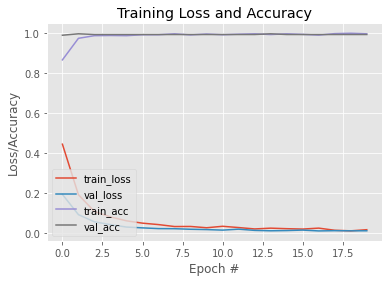

In [20]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(plot_path)

In [21]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
